# Supervised Learning - Project Description
Beta Bank customers are leaving: little by little, chipping away every month. The bankers figured out it’s cheaper to save the existing customers rather than to attract new ones.
We need to predict whether a customer will leave the bank soon. You have the data on clients’ past behavior and termination of contracts with the bank.
Build a model with the maximum possible F1 score. 

To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.
Additionally, measure the AUC-ROC metric and compare it with the F1.

## Project instructions
1.	Download and prepare the data. Explain the procedure.
2.	Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.
3.	Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.
4.	Perform the final testing.

## Data description
**Features**
 - RowNumber — data string index
 - CustomerId — unique customer identifier
 - Surname — surname
 - CreditScore — credit score
 - Geography — country of residence
 - Gender — gender
 - Age — age
 - Tenure — period of maturation for a customer’s fixed deposit (years)
 - Balance — account balance
 - NumOfProducts — number of banking products used by the customer
 - HasCrCard — customer has a credit card
 - IsActiveMember — customer’s activeness
 - EstimatedSalary — estimated salary

**Target**
 - Exited — сustomer has left

## Step 1 
Download and prepare the data. Explain the procedure.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import *
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, r2_score
from sklearn.utils import shuffle


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
display(data.sample(10, random_state = 1357))
display(data.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2769,2770,15730433,Nakayama,580,Germany,Female,38,1.0,128218.47,1,1,0,125953.83,1
8974,8975,15697129,Ulyanova,706,Spain,Female,43,NaN,0.00,2,1,0,31962.77,0
9207,9208,15643770,Yu,682,France,Female,52,5.0,112670.48,1,1,0,21085.17,1
340,341,15745844,Kerr,642,Germany,Female,40,6.0,129502.49,2,0,1,86099.23,1
2179,2180,15787459,Parkes,745,Spain,Male,40,3.0,88466.82,1,0,0,116331.42,0
5595,5596,15616431,Chiu,608,France,Male,33,4.0,0.00,1,0,1,130474.03,0
1942,1943,15651713,King,684,France,Male,45,6.0,148071.39,1,1,0,183575.01,0
5053,5054,15674433,Allan,636,Germany,Female,28,2.0,115265.14,1,0,0,191627.85,0
749,750,15698839,Okwudilichukwu,460,Germany,Male,46,NaN,127559.97,2,1,1,126952.50,0
5504,5505,15625584,Martin,786,France,Male,32,NaN,120452.40,2,0,0,79602.86,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

In [3]:
new_columns = {'RowNumber':'row_number',
          'CustomerId':'customer_id',
          'Surname':'surname',
          'CreditScore':'credit_score',
          'Geography':'geography',
          'Gender':'gender',
          'Age':'age',
          'Tenure':'tenure',
          'Balance':'balance',
          'NumOfProducts':'num_of_products',
          'HasCrCard':'has_cc',
          'IsActiveMember':'is_active_member',
          'EstimatedSalary':'estimated_salary',
          'Exited':'exited'}

data = data.rename(columns=new_columns)
data = data.drop(['row_number'], axis = 1)
data = data.drop(['customer_id'], axis = 1)
data = data.drop(['surname'], axis = 1)

In [4]:
data['gender'] = (data['gender']=='Female').astype(int)

le_geo = LabelEncoder()
data['geography'] = le_geo.fit_transform(data['geography'])

display(data.sample(10, random_state = 1357))

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cc,is_active_member,estimated_salary,exited
2769,580,1,1,38,1.0,128218.47,1,1,0,125953.83,1
8974,706,2,1,43,NaN,0.00,2,1,0,31962.77,0
9207,682,0,1,52,5.0,112670.48,1,1,0,21085.17,1
340,642,1,1,40,6.0,129502.49,2,0,1,86099.23,1
2179,745,2,0,40,3.0,88466.82,1,0,0,116331.42,0
5595,608,0,0,33,4.0,0.00,1,0,1,130474.03,0
1942,684,0,0,45,6.0,148071.39,1,1,0,183575.01,0
5053,636,1,1,28,2.0,115265.14,1,0,0,191627.85,0
749,460,1,0,46,NaN,127559.97,2,1,1,126952.50,0
5504,786,0,0,32,NaN,120452.40,2,0,0,79602.86,0


In [5]:
display(data['tenure'].isna().value_counts())

False    9091
True      909
Name: tenure, dtype: int64

In [6]:
data.dropna(subset=['tenure'], inplace=True)
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 0 to 9998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      9091 non-null   int64  
 1   geography         9091 non-null   int64  
 2   gender            9091 non-null   int64  
 3   age               9091 non-null   int64  
 4   tenure            9091 non-null   float64
 5   balance           9091 non-null   float64
 6   num_of_products   9091 non-null   int64  
 7   has_cc            9091 non-null   int64  
 8   is_active_member  9091 non-null   int64  
 9   estimated_salary  9091 non-null   float64
 10  exited            9091 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 852.3 KB


None

After looking at the data, we could see that the `'tenure'` column has missing values. With the missing values being under 10%, I have decided to remove those rows from our data. Per personal preference and common rule, I have changed the column names to snake-case. I have also removed the unnecessary columns (`'row_number'`, `'customer_id'`, and `'surname'`). The gender column and geography column were also changed to int with numbers representing each gender or location respectively.

Now that we have downloaded and prepared the data. Let's move on.

## Step 2
Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.

In [7]:
# assigning the features and target

features = data.drop('exited', axis = 1)
target = data['exited']

In [8]:
# splitting the data

features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size = 0.2, random_state = 1357)

features_train, features_valid, target_train, target_valid = train_test_split(
features_train, target_train, test_size = 0.25, random_state = 1315)

display(features_train.shape)
display(features_test.shape)
display(features_valid.shape)

(5454, 10)

(1819, 10)

(1818, 10)

0    0.796062
1    0.203938
Name: exited, dtype: float64

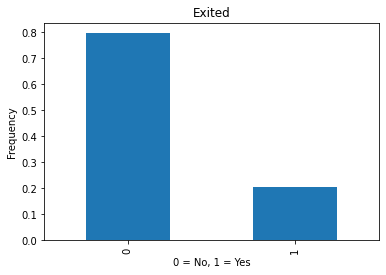

In [9]:
class_frequency = target.value_counts(normalize=True)
display(class_frequency)
class_frequency.plot(kind = 'bar', title = 'Exited', xlabel = '0 = No, 1 = Yes', ylabel = 'Frequency')
plt.show()

In [10]:
target_pred_constant = pd.Series(0, index=target.index)
display(accuracy_score(target, target_pred_constant))

0.7960620393796062

In [11]:
# scaling numeric data

numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary' ]

In [12]:
# standardizing our data

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

display(features_train.shape)
display(features_test.shape)
display(features_valid.shape)

(5454, 10)

(1819, 10)

(1818, 10)

### Building and Training Models

In [13]:
# DecisionTreeClassification parameters

dtc_parameters = {
"random_state":[1357],
"max_depth":[*range(1,11,1)],
"min_samples_split":[*range(1,11,1)],
"min_samples_leaf":[*range(1,11,1)],
"class_weight":['balanced']}

In [14]:
# RandomForestClassifier parameters

rfc_parameters = {
"random_state":[1357],
"n_estimators":[*range(1,21,1)],
"max_depth":[*range(1,21,1)],
"class_weight":['balanced']}

In [15]:
lr_parameters = {
"random_state":[1357],
"solver":['liblinear'],
"class_weight":['balanced']}

In [16]:
dtc_model = GridSearchCV(DecisionTreeClassifier(), dtc_parameters, cv=5).fit(features_train, target_train)
display(dtc_model.best_params_)

{'class_weight': 'balanced',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 1357}

In [17]:
rfc_model = GridSearchCV(RandomForestClassifier(), rfc_parameters, cv=5).fit(features_train, target_train)
display(rfc_model.best_params_)

{'class_weight': 'balanced',
 'max_depth': 14,
 'n_estimators': 19,
 'random_state': 1357}

In [18]:
lr_model = GridSearchCV(LogisticRegression(), lr_parameters, cv=5).fit(features_train, target_train)
display(lr_model.best_params_)

{'class_weight': 'balanced', 'random_state': 1357, 'solver': 'liblinear'}

In [19]:
def score_report(model, features, target, predictions):
    accuracy = accuracy_score(target, predictions)
    recall = round(recall_score(target,predictions),3)
    precision = round(precision_score(target,predictions),3)
    f1 = round(f1_score(target,predictions),3)
    roc_auc = round(roc_auc_score(target,predictions),3)
    probabilities = model.predict_proba(features)
    probabilities_test = model.predict(features_test)
    #roc_auc = round(roc_auc_score(target,probabilities_test),3)
    auc_roc = roc_auc_score(target_test, probabilities_test)
    fpr, tpr, thresholds = roc_curve(target, probabilities[:,1])
    plt.plot(fpr,tpr)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()
    report = pd.DataFrame(data={
        'accuracy':[accuracy],
        'recall_score':[recall],
        'precision':[precision],
        'f1_score':[f1],
        #'roc_auc':[roc_auc],
        'roc_auc_score':[auc_roc]})
    return report

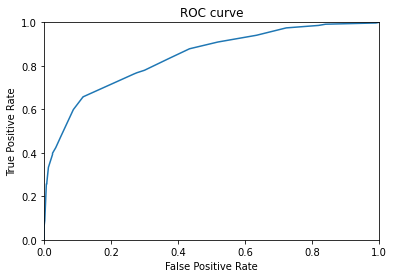

,accuracy,recall_score,precision,f1_score,roc_auc_score
0,0.839384,0.658,0.577,0.615,0.750169


In [20]:
dtc_predict_valid = dtc_model.predict(features_valid)
display(score_report(model=dtc_model, features=features_valid, target=target_valid, predictions=dtc_predict_valid))

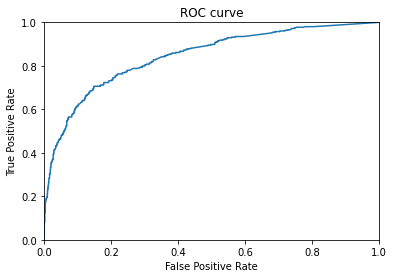

,accuracy,recall_score,precision,f1_score,roc_auc_score
0,0.854785,0.492,0.674,0.569,0.708763


In [21]:
rfc_predict_valid = rfc_model.predict(features_valid)
display(score_report(model=rfc_model,features=features_valid,target=target_valid, predictions=rfc_predict_valid))

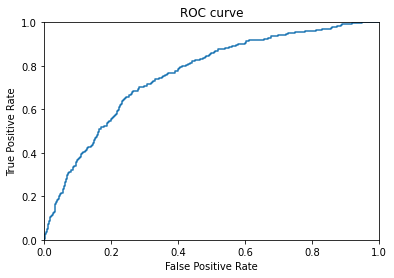

,accuracy,recall_score,precision,f1_score,roc_auc_score
0,0.69637,0.715,0.359,0.478,0.679989


In [22]:
lr_predict_valid = lr_model.predict(features_valid)
display(score_report(model=lr_model, features=features_valid, target=target_valid, predictions=lr_predict_valid))

The RandomForestClassifier had a low recall score and a high precision score, but the DecisionTreeClassifier and LogisticRegression modles had a high recall and a low percision score. This means that these two models need higher percision which calls for downsampling. Next I will be using upsampling and downsampling to try to find all possible improvements.

## Step 3
Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.

### Upsampling

In [23]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=1357)

    return features_upsampled, target_upsampled

In [24]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

In [25]:
# LogisticRegression

model = LogisticRegression(random_state=1357, solver='liblinear', class_weight = 'balanced')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4782608695652174


In [26]:
# DecisionTreeClassifier

for depth in range(1, 6):
    model = model = DecisionTreeClassifier(random_state = 1315, max_depth = depth)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
  
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.6119205298013245


In [27]:
# RandomForestClassifier

best_score = 0
best_est = 0
for est in range(1,6):
    model = RandomForestClassifier(random_state = 1357, n_estimators = est)
    model.fit(features_train, target_train)
    score = model.score(features_valid, target_valid)
    if score > best_score:
        best_score = score
        best_est = est

display("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score))  

'Accuracy of the best model on the validation set (n_estimators = 5): 0.856985698569857'

In [28]:
rfc_model = RandomForestClassifier(random_state = 1357, n_estimators = best_est)
rfc_model.fit(features_upsampled, target_upsampled)
predicted_valid = rfc_model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.5480225988700564


With the upsampling, the best F1 score we see comes from DecisionTreeClassifier with a score of 0.61 (rounded). Now let's check how downsampling does.

### Downsampling

In [29]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=1357)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=1357)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

In [30]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

In [31]:
# LogisticRegression

model = LogisticRegression(random_state=12345, solver = 'liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4696132596685083


In [32]:
# DecisionTreeClassifier

for depth in range(1, 6):
    model = model = DecisionTreeClassifier(random_state = 1315, max_depth = depth)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.5871121718377087


In [33]:
# RandomForestClassifier

best_score = 0
best_est = 0
for est in range(1,6):
    model = RandomForestClassifier(random_state = 1357, n_estimators = est)
    model.fit(features_train, target_train)
    score = model.score(features_valid, target_valid)
    if score > best_score:
        best_score = score
        best_est = est

display("Accuracy of the best model on the validation set (n_estimators = {}): {}".format(best_est, best_score)) 

'Accuracy of the best model on the validation set (n_estimators = 5): 0.856985698569857'

In [34]:
rfc_model = RandomForestClassifier(random_state = 1357, n_estimators = best_est)
rfc_model.fit(features_downsampled, target_downsampled)
predicted_valid = rfc_model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.527831094049904


With the downsampling, the best F1 score we see also comes from DecisionTreeClassifier with a score of 0.59 (rounded). Our earlier results with the upsampling using the DecisionTreeClassifier performed better.

## Step 4
Perform the final testing.

In [35]:
final_model = DecisionTreeClassifier(random_state = 1315, max_depth = depth)
final_model.fit(features_upsampled, target_upsampled)
predicted_test = final_model.predict(features_test)

print('F1:', f1_score(target_test, predicted_test))

F1: 0.5867665418227216


In [36]:
for depth in range(1, 6):
    model = model = DecisionTreeClassifier(random_state = 1315, max_depth = depth)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)

print('F1:', f1_score(target_valid, predicted_valid))

final_model = DecisionTreeClassifier(random_state = 1315, max_depth = 5)

F1: 0.5871121718377087


In [37]:
final_accuracy = accuracy_score(target_test, predicted_test)
final_recall = round(recall_score(target_test, predicted_test),3)
final_precision = round(precision_score(target_test, predicted_test),3)
final_f1 = round(f1_score(target_test, predicted_test),3)

report = pd.DataFrame(data={
        'accuracy':[final_accuracy],
        'recall_score':[final_recall],
        'precision':[final_precision],
        'f1_score':[final_f1],})
display(report)

,accuracy,recall_score,precision,f1_score
0,0.818032,0.632,0.548,0.587


## Final Summary

After performing upsampling on the three models our best F1 score was from the DecisionTreeClassification with a score of 0.61 (rounded). With downsampling, our best F1 score was also found with DecisionTreeClassification with a score of 0.59 (rounded). Since our overall best was with the upsampling of the DecsionTreeClassification model, that was the model used in our testing.

After testing the upsampled DecisionTreeModel we achieved a F1 score of 0.59 (rounded). Our recall score is 0.632 and our precision score is 0.548. This means our model is fairly balanced, but is slightly more common to have false positives, and fewer false negatives. With an AUC-ROC score of 0.818, our result is better than the random model as well.